<span style="color:red">**1.SORU**</span>


Text(0.5, 1.0, 'histogram of gray values')

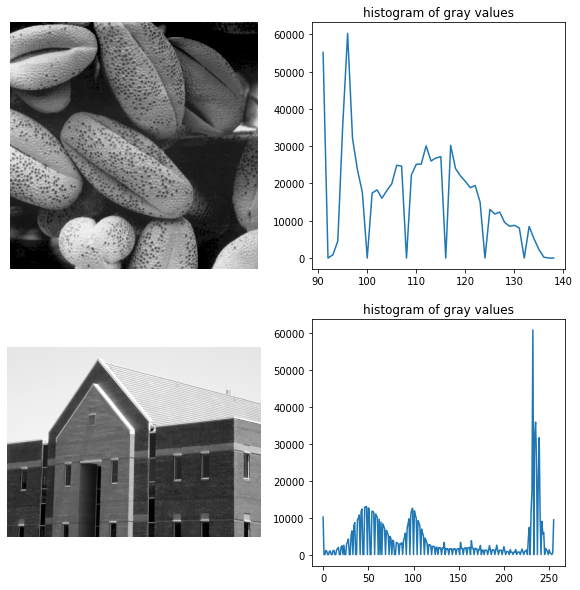

In [28]:
import matplotlib.pyplot as plt
from skimage.exposure import histogram 
from skimage import io

#Resimler okundu.
imageWashedPolen = io.imread('washedPolen.tif') 
imageBuilding = io.imread('building.tif')

#Histogramlar oluşturuldu.
hist , histCenters = histogram(imageWashedPolen)
hist1 , histCenters1 = histogram(imageBuilding)

#Her çıktı için alan alt parçalara bölündü ve yerleştirildi.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0][0].imshow(imageWashedPolen, cmap='gray')
axes[0][0].axis('off')

axes[0][1].plot(histCenters, hist)
axes[0][1].set_title('histogram of gray values')

axes[1][0].imshow(imageBuilding, cmap='gray')
axes[1][0].axis('off')

axes[1][1].plot(histCenters1, hist1)
axes[1][1].set_title('histogram of gray values')


<span style="color:red">**2.SORU**</span>

Text(0.5, 1.0, 'Histogram Equalize')

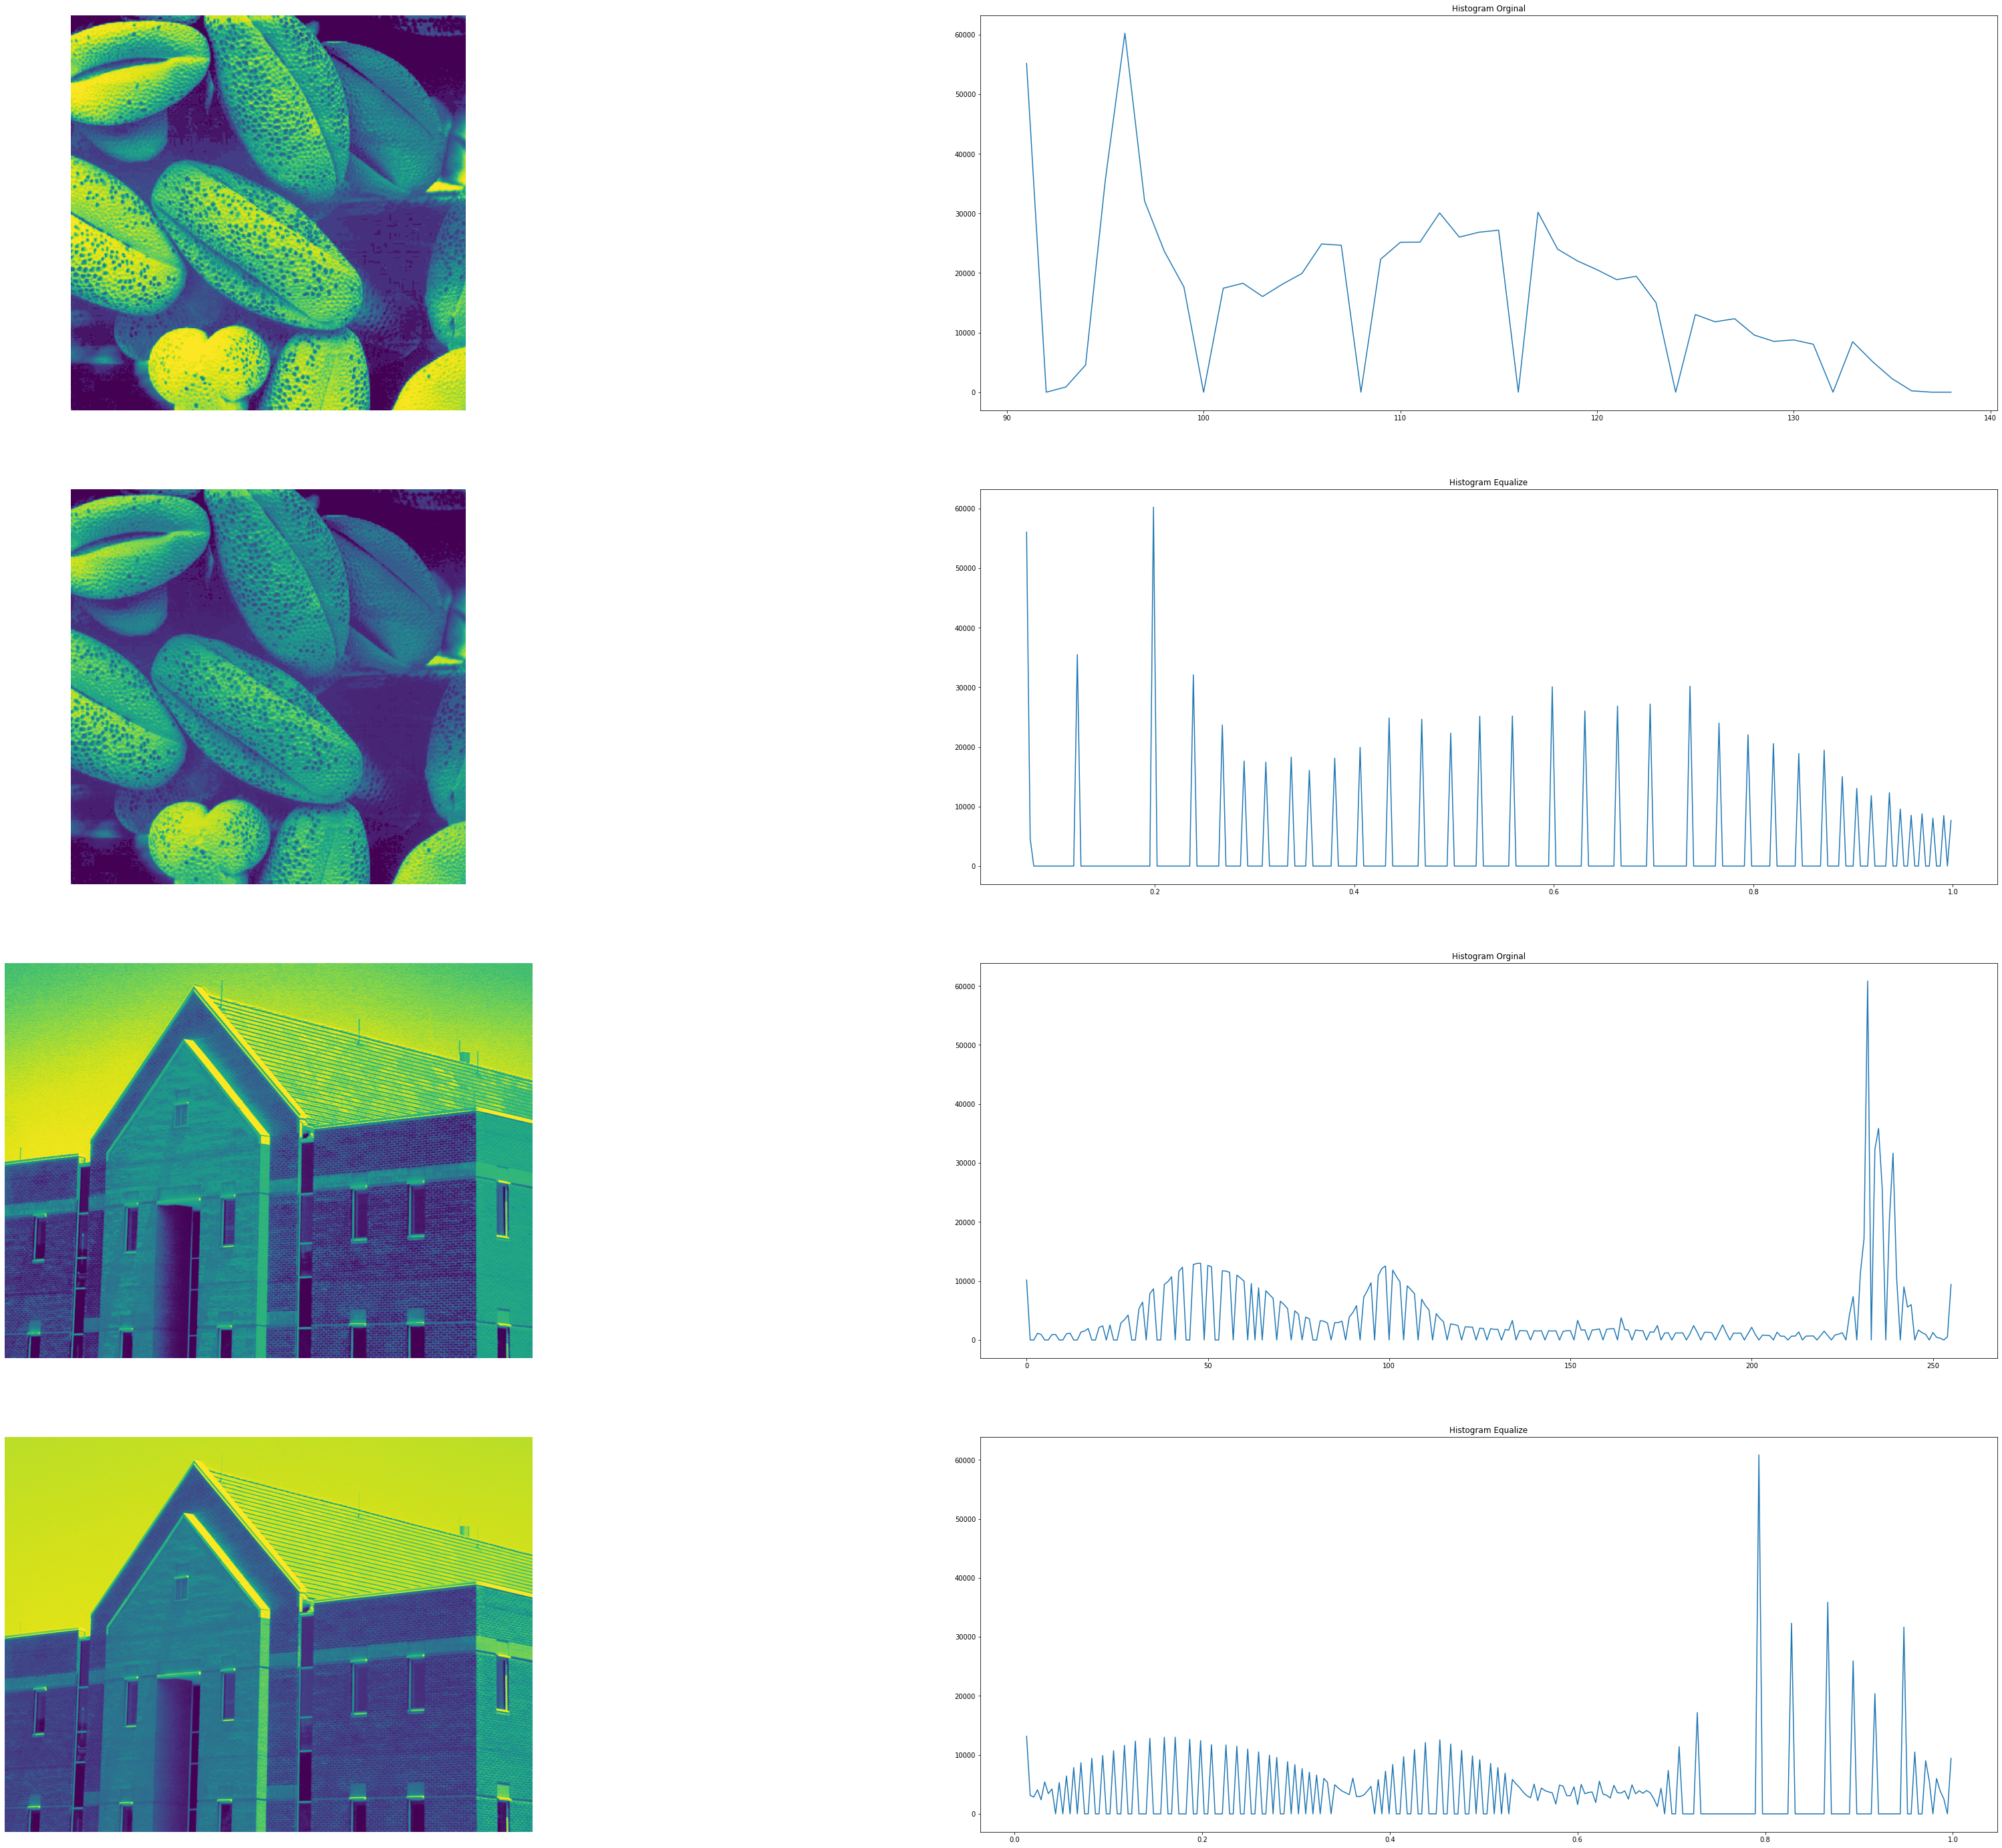

In [29]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import histogram , equalize_hist

#Resimler okundu.
imageWashedPolen = io.imread('washedPolen.tif') 
imageBuilding = io.imread('building.tif')

# Histogram equalization işlemi yapıldı.
img_rescale = exposure.equalize_hist(imageWashedPolen)
img_rescale1 = exposure.equalize_hist(imageBuilding)

#Histogramlar oluşturuldu.
histPolen , histCentersPolen = histogram(imageWashedPolen)
histBuild , histCentersBuild = histogram(imageBuilding)
hist , histCenters = histogram(img_rescale)
hist1 , histCenters1 = histogram(img_rescale1)
hist2 , histCenters2 = histogram(imageWashedPolen)
hist3 , histCenters3 = histogram(imageBuilding)

#Her çıktı için alan alt parçalara bölündü ve yerleştirildi.
fig, axes = plt.subplots(4, 2, figsize=(60, 50))


axes[0][0].imshow(img_rescale)
axes[0][0].axis('off')

axes[0][1].plot(histCentersPolen, histPolen)
axes[0][1].set_title('Histogram Orginal')

axes[1][0].imshow(imageWashedPolen)
axes[1][0].axis('off')

axes[1][1].plot(histCenters, hist)
axes[1][1].set_title('Histogram Equalize')


axes[2][0].imshow(img_rescale1)
axes[2][0].axis('off')

axes[2][1].plot(histCentersBuild, histBuild)
axes[2][1].set_title('Histogram Orginal')

axes[3][0].imshow(imageBuilding)
axes[3][0].axis('off')

axes[3][1].plot(histCenters1, hist1)
axes[3][1].set_title('Histogram Equalize')



Normal histogram formülünü resim boyutlarının çarpımına böldüğümüzde normalize edilmiş histogram formülünü elde ederiz.Normalize edilmiş histogramın amacı ise düşük kontrastlı resimleri yüksek kontrastlı resimler haline getirmektir.Burada bulunan orginal resimlerin histogramlarının belli noktalarında bulunan pikseller daha az sıklıkla farklı değerler almaktadır.Histogram equalize işleminden sonra çizilen histogramlarda ise piksellerin değerlerinin daha sık yayılım gösterdiğini görebiliriz.Böylece orginal resimlerdeki aydınlatma sorunu giderilmiştir.

<span style="color:red">**3.SORU**</span>

[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]


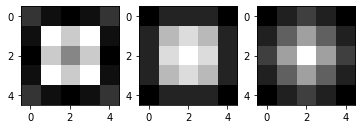

In [30]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as ndi

%precision 2

def gauss_filtre_olustur(m,n,sigma): #Laplacian of Gaussian (Log) formülü için yazılmış olan fonksiyon. 
    #resmin boyutları 2 ye bölüp yuvarlıyoruz çünkü resmin index değerlerine erişmek istiyoruz s ve t değerlerin resmin indeksleri (0,0) orta noktası
    yarim_m=m//2
    yarim_n=n//2
    gauss_filtre=np.empty((m,n))#Boş bir matris oluşturuldu.
    for s in range(-yarim_m,yarim_m+1):#Boş matrisin içerisi index değerleriyle doldurdu.
        for t in range(-yarim_n,yarim_n+1):
          #Formül için değişkenler oluşturuldu.
            r_kare=s**2+t**2
            payda=2*sigma**2
            kuvvet=-(r_kare/payda)
            K=(r_kare-payda)/(sigma**4)
            deger=K*np.exp(kuvvet)

            python_s=yarim_m+s#indeksleri python indexlerine dönüştürüyoruz.
            python_t=yarim_n+t

            gauss_filtre[python_s,python_t]=deger
    
    return gauss_filtre / gauss_filtre.sum()
m=n=3

#Zero-crossing işlemi yapıldı.
bright_square = np.zeros((m+n-1, m+n-1), dtype=float)
bright_square[1:4, 1:4] = 1

print(bright_square)

#Konvolüsyon işlemi yapıldı.
sigma1=ndi.convolve(bright_square,gauss_filtre_olustur(m,n,0.5))
sigma10=ndi.convolve(bright_square,gauss_filtre_olustur(m,n,1))
sigma100=ndi.convolve(bright_square,gauss_filtre_olustur(m,n,1000))




#Her çıktı için alan alt parçalara bölündü ve yerleştirildi.
plt.subplot(1, 3,1)
plt.imshow(sigma1, cmap='gray')


plt.subplot(1, 3, 2)
plt.imshow(sigma10, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(sigma100, cmap='gray')






Sigma filtrenin ölçeğidir.Sigma ne kadar büyükse, çizgiler o kadar geniş, kenarlar o kadar yumuşak olur ve daha fazla gürültü göz ardı edilir.Burada sigma 0.5,1 ve 1000 değerlerini almıştı.Sigma değeri büyüdükçe renk skalası artmış,renklerin tonları farklılaşmıştır.

<span style="color:red">**4.SORU**</span>

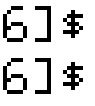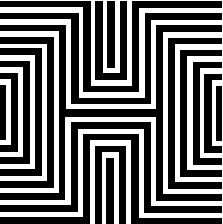



**Resimlerin orginal halleri.**





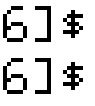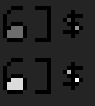

**semboller.pgm resminin 8'lik ve 4'lük komşularına göre etiketlenmiş hallerinin çıktıları.**

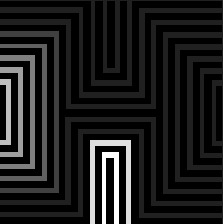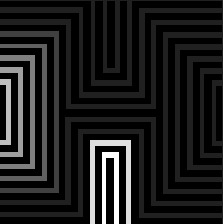

**labirent.pgm resminin 8'lik ve 4'lük komşularına göre etiketlenmiş hallerinin çıktıları.**



Çıktıların kodlamaları 4neighbor.ipynb ve 8neighbor.ipynb adlı dosyalarda bulunmaktadır.Nesnelerin pixselleri komşuluk ilişkisine göre etiketlenip sınıflandırılır böylece nesnenin belirlenmesi sağlanır.Yani bağımsız parçaları etiketlemek ya da bu ayrı parçaların sayısını bulmak adına Connected Component analizi yürütülür. 8'lik komşuluk seçildiğinde çapraz piksellerin de komşu olduğu kabul edilir.semboller.pgm adlı resimde çapraz pikseller birbirinden farklı oldukları için 8 'lik komşuluk ilişkisinde 4'lük komşuluk ilişkisine göre orjinal görüntüye daha yakın bir çıktı vermiştir.labirent.pgm resminde ise resim görüntü tekrarından oluştuğu için 4'lük ve 8'lik görüntü içinde benzer çıktılar vermiştir.

labirent.pgm görüntüsünde 4 komşuluk için component sayısı:8.0


semboller.pgm görüntüsünde 4 komşuluk için component sayısı:7.0


semboller.pgm görüntüsünde 8 komşuluk için component sayısı:1.0


labirent.pgm görüntüsünde 8 komşuluk için component sayısı:8.0


<span style="color:red">**5.SORU**</span>

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


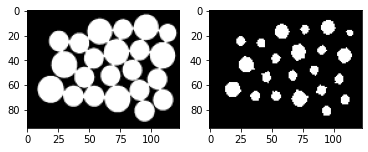

In [32]:
# Erosion shrinks bright regions
import io
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import disk, binary_dilation, binary_erosion
from skimage import io


def readpgm(name):#pgm formatında olan resimleri okumak için yazılmış olan fonksiyon.
    with open(name) as f:
        lines = f.readlines()

    # Yorum satırlarını yok sayar.
    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    # ASCII formatı (P2) olduğundan emin olur.
    assert lines[0].strip() == 'P2' 

    # Verileri bir tamsayı listesine dönüştürür.
    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])

data = readpgm('coins.pgm')
coins=np.reshape(data[0],data[1])

#Disk boyutuna göre aşındırma işlemi yapar.
imgErosion= binary_erosion(coins, disk(5))
print(disk(5))


#Her çıktı için alan alt parçalara bölündü ve yerleştirildi.
plt.subplot(1, 2,1)
plt.imshow(coins, cmap='gray')


plt.subplot(1, 2, 2)
plt.imshow(imgErosion, cmap='gray')



Disk pixeli 11 alındığında çap büyük olduğu için nesneleri çok fazla aşındırmış oldu.Bu yüzden pixeli 5 olarak bıraktım.

**Aşındırma (erosion) işlemi ile “Boundary extraction” işlemi yapılabilir.**

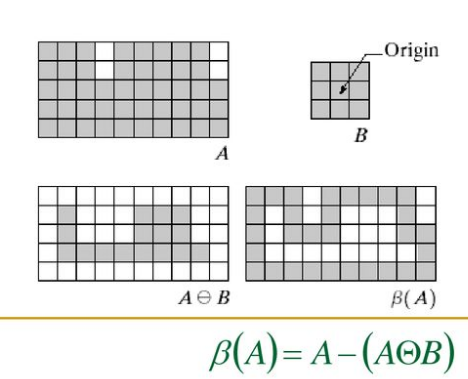


1. A'nın B yapılandırma elamanı tarafından aşındırılması yapılır.
2. A ile aşındırma arasındaki fark alınır. 

Böylece aşındırma işlemi ile Boundary exraction işlemi yapılmış olur.


